# Find and Remove Outliers
As a data analyst, handling outliers is a critical step in the data preprocessing phase. Outliers are data points that significantly differ from the majority of your dataset. These can arise due to errors, rare events, or natural variability. Here's how to find and remove outliers:

### Step 1: Understand Outliers
Definition: An outlier is a data point that lies far outside the typical range of values.
#### Sources:
Data entry errors<br>
Measurement errors<br>
Genuine rare events<br>
#### Impact:
Skew the mean<br>
Affect model accuracy and performance<br>

### Step 2: Techniques to Detect Outliers
#### 1. Visual Inspection
**Boxplot:**<br>
Outliers appear as points outside the whiskers of the boxplot.

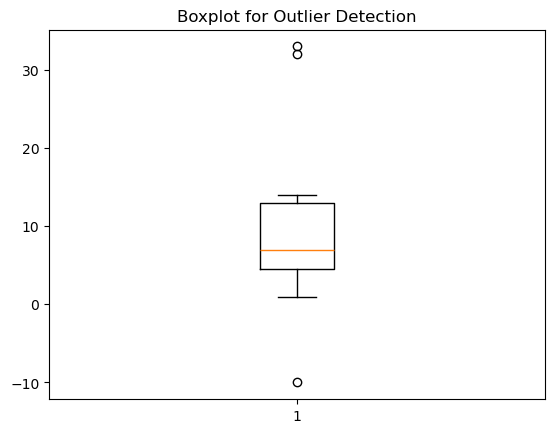

In [87]:
# Python Code Example
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame({
    "Value" : [-10,1,4,5,6,7,8,12,14,32,33]
})

plt.boxplot(data["Value"])
plt.title("Boxplot for Outlier Detection")
plt.show()

#### 2. Statistical Methods

**Z-Score:**<br>
Measures how far a point is from the mean in terms of standard deviations.<br>


In [52]:
from scipy.stats import zscore

data["Z_Score"] = zscore(data["Value"])
outliers = data[data["Z_Score"].abs() > 1]
outliers

,Value,Z_Score
0,-10,-1.671490
9,32,1.807016
10,33,1.889837


#### IQR (Interquartile Range):
Identifies outliers as points outside 1.5 times the IQR from the quartiles.

In [77]:
import numpy as np
q1 = np.percentile(data["Value"], 25)
q3 = np.percentile(data["Value"], 75)
IQR = q3 - q1

lower_bound = q1 - 1.5*(IQR)
higher_bound = q3 + 1.5*(IQR)
print(lower_bound)
print(higher_bound)
outliers = data[(data["Value"] < lower_bound) | (data["Value"] > higher_bound)]
outliers

-8.25
25.75


,Value,Z_Score
0,-10,-1.671490
9,32,1.807016
10,33,1.889837


### Step 3: Handling Outliers
#### 1. Remove Outliers
Simply filter out rows identified as outliers.

In [68]:
clean_data = data[(data["Value"] >= lower_bound) & (data["Value"] <= higher_bound)]
clean_data

,Value,Z_Score
1,1,-0.760452
2,4,-0.511988
3,5,-0.429166
4,6,-0.346345
5,7,-0.263523
6,8,-0.180702
7,12,0.150585
8,14,0.316228
